# Part 2. Google+ Network
In this part, we will explore the structure of the Google+ network. The dataset for creating the network can be found in the link below:

http://snap.stanford.edu/data/egonets-Gplus.html

Create directed personal networks for users who have more than 2 circles. The data required to create such personal networks can be found in the file named gplus.tar.g

In [1]:
import glob
import os
import matplotlib.pyplot as plt
import igraph as ig

file_path ="gplus/" 
# below is R, we implement using Python
#edge_files = list.files(path=file_path,pattern="edges") 
#circles_files = list.files(path=file_path,pattern="circles")
#fts_files = list.files(path=file_path,pattern="feat")
edge_files = glob.glob(file_path + "*edges*")
circles_files = glob.glob(file_path + "*circles*")
fts_files = glob.glob(file_path + "*feat*")

initial_graph = list()
final_graph = list()
graph_circles = list()
ego_nodes = list()

In [ ]:
'''R
cnt = 0
node_names = c()
for(i in 1:length(edge_files)){
    # get node id
    node = strsplit(edge_files[i],".edges")[[1]]
    node_names <-c(node_names,node)
    #print(node)
    ego_nodes[i] = node
    fc = file(paste(file_path,node,".circles",sep=""),open="r") 
    if(length(fc)>0){
        file_lines <- readLines(fc)
        if(length(file_lines)>0){
            circles =list()
            for(j in 1:length(file_lines)){
                circle_users = strsplit(file_lines[j],"\t")
                circles[[j]] <- circle_users[[1]][-1]
              }
            # find users who have more than 2 circles
            if(length(circles)>2){
                cnt = cnt + 1
                initial_graph[[i]] <- read.graph(paste(file_path,edge_files[i],sep=""),format="ncol",directed=TRUE)
                graph_circles[[i]] <- circles
                graph_nodes <- V(initial_graph[[i]])
                print(length(graph_nodes))
                print(node)
                # add the core node to his neighbor list and construct the graph
                final_graph[[i]] <- add.vertices(initial_graph[[i]],1,name=node)
                core_index = which(V(final_graph[[i]])$name==node) 
                core_node_edges = list()
                ### add edges connecting to this core node
                for(k in 1:length(graph_nodes)){
                    core_node_edges = c(core_node_edges, c(core_index, k))
                }
                final_graph[[i]] <- add.edges(final_graph[[i]],core_node_edges)
            } 
        }
    }
    close(fc)
}
'''

In [ ]:
# ref: this function is converted from above R function, using AI
import os
from igraph import Graph

cnt = 0
node_names = []

node_statistics = []

for i in range(len(edge_files)):
    edge_file_name = os.path.basename(edge_files[i])
    node = edge_file_name.split(".edges")[0]
    node_names.append(node)
    ego_nodes.append(node)
    
    circle_file_path = os.path.join(file_path, node + ".circles")
    
    if os.path.exists(circle_file_path):
        with open(circle_file_path, "r") as fc:
            file_lines = fc.readlines()
            
            if len(file_lines) > 0:
                circles = []
                for j in range(len(file_lines)):
                    circle_users = file_lines[j].strip().split("\t")
                    circles.append(circle_users[1:])
                if len(circles) > 2:
                    cnt += 1
                    initial_g = Graph.Read_Ncol(edge_files[i], directed=True)
                    initial_graph.append(initial_g)
                    graph_circles.append(circles)
                    
                    graph_nodes = initial_g.vs["name"] 
                    
                    # for diagram
                    node_statistics.append((len(graph_nodes), node))

                    print(f"[INFO] Node ID: {node}")
                    print(f"[INFO] Number of Neighbor Nodes: {len(graph_nodes)}")
                    
                    final_g = initial_g.copy()
                    final_g.add_vertices(1)
                    core_node_index = len(final_g.vs) - 1
                    final_g.vs[core_node_index]["name"] = node
                    
                    core_node_edges = []
                    for k in range(len(graph_nodes)):
                        core_node_edges.append((core_node_index, k))
                    
                    final_g.add_edges(core_node_edges)
                    final_graph.append(final_g)
    else:
        print(f"[WARNING] Circle file {circle_file_path} does not exist.")

print(f"[SUMMARY] Total valid nodes with >2 circles: {cnt}")

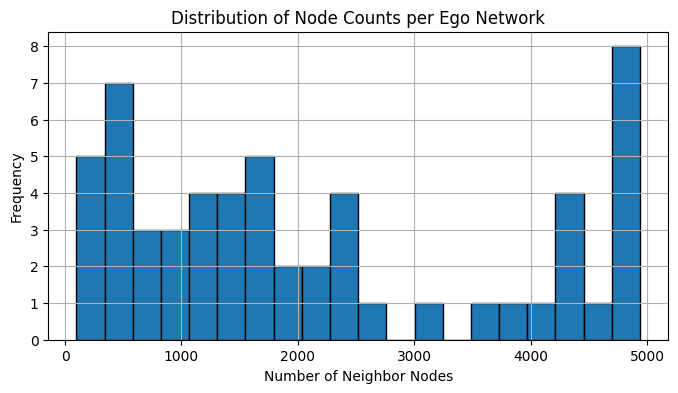

In [4]:
import matplotlib.pyplot as plt
def plot_node_distribution(statistics):
    node_counts = [item[0] for item in statistics]

    plt.figure(figsize=(8, 4))
    plt.hist(node_counts, bins=20, edgecolor='black')
    plt.title('Distribution of Node Counts per Ego Network')
    plt.xlabel('Number of Neighbor Nodes')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

plot_node_distribution(node_statistics)

#### QUESTION 18: How many personal networks are there?

In [5]:
#q18
# cat("there are ", length(edge_files),"nodes and there are ",cnt,"personal networks" )
print(f"There are {len(edge_files)} nodes and there are {cnt} personal networks.")

There are 132 nodes and there are 57 personal networks.


#### QUESTION 19: 
For the 3 personal networks (node ID given below), plot the in-degree and outdegree distribution of these personal networks. Do the personal networks have a similar in and out degree distribution? 

In this question, you should have 6 plots.
- 109327480479767108490
- 115625564993990145546
- 101373961279443806744

In [ ]:
#q19 
'''R
interest_node = c('109327480479767108490', '115625564993990145546','101373961279443806744')
graph_inds = c()
for (i in 1: length(interest_node)){
    graph_ind <- which(node_names==interest_node[i])
    graph_inds <- c(graph_inds, graph_ind)
    print(graph_ind)
    tmp_graph = final_graph[[graph_ind]]
    hist(degree(tmp_graph, mode="in"),main = paste("in degree for ", interest_node[i]))
    hist(degree(tmp_graph, mode="out"),main = paste("out degree for ", interest_node[i]))
}
'''

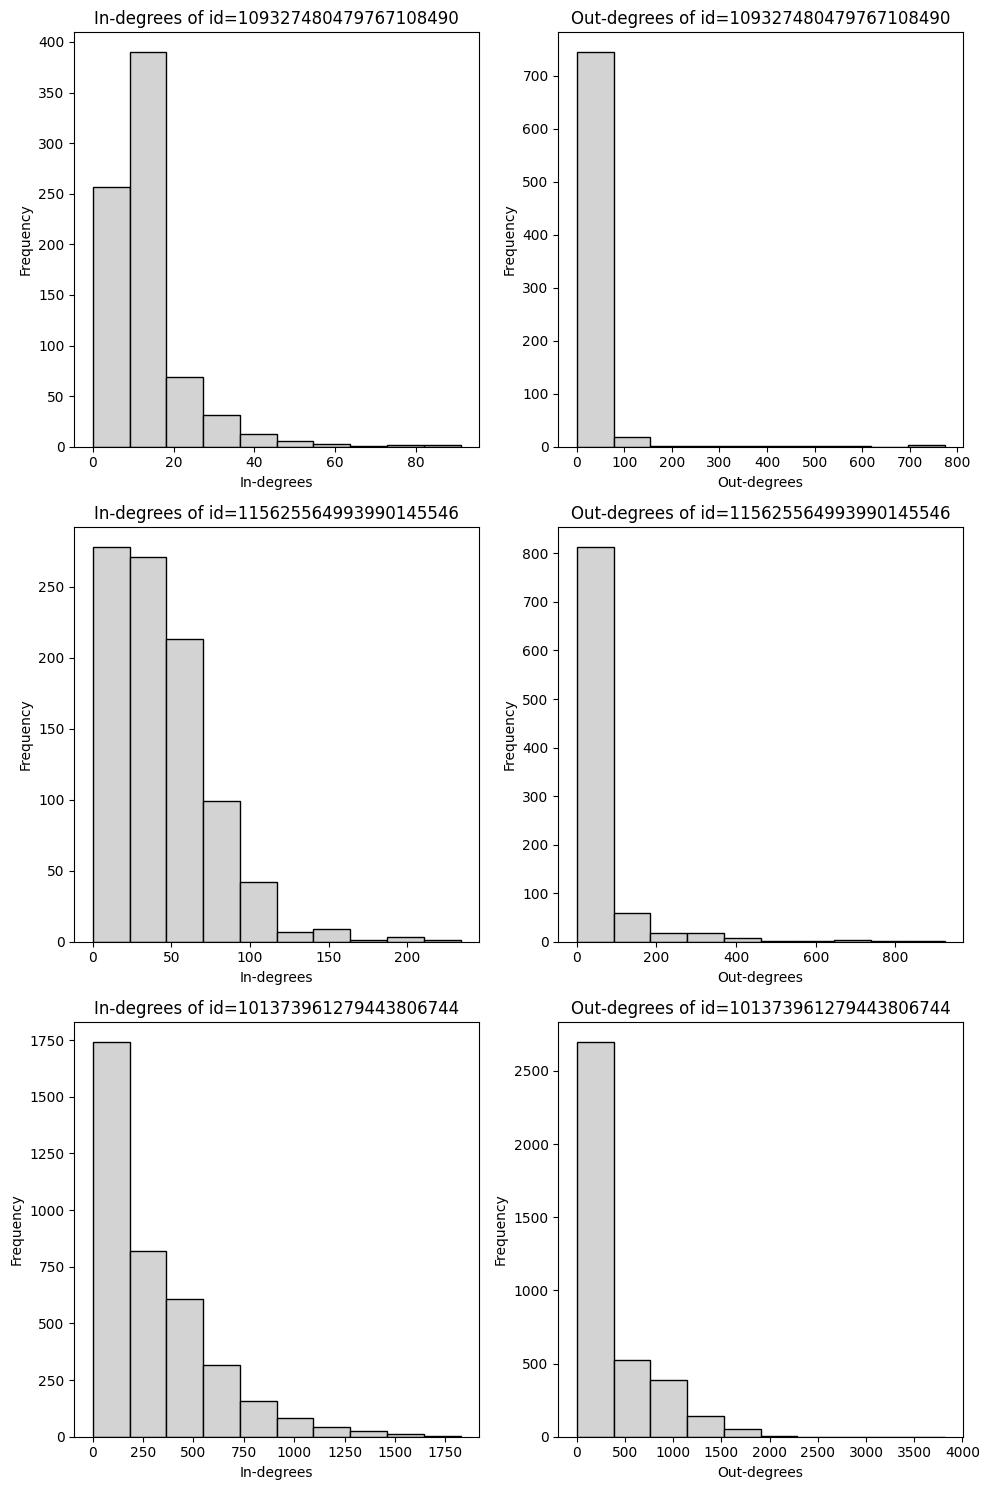

In [26]:

def construct_graph(path, node_name):
    graph = ig.Graph.Read_Ncol(path, directed=True)
    graph.add_vertex(name=node_name)
    ego_node_index = graph.vcount() - 1 
    # create edges from the ego node to all existing nodes
    new_edges = []
    for i in range(ego_node_index):
        new_edges.append((ego_node_index, i))
    # add the new edges to the graph
    graph.add_edges(new_edges)
    
    return graph

interest_node = ['109327480479767108490', '115625564993990145546', '101373961279443806744']
interest_paths = [os.path.join(file_path, f"{node_id}.edges") for node_id in interest_node]

interest_graphs = []
for i in range(len(interest_node)):
    path = interest_paths[i]
    node_id = interest_node[i]
    if os.path.exists(path):
        graph = construct_graph(path, node_id)
        interest_graphs.append((node_id, graph))

plt.figure(figsize=(10, 15))  

for idx, (node_id, graph) in enumerate(interest_graphs):
    in_degrees = graph.degree(mode="IN")
    out_degrees = graph.degree(mode="OUT")
    
    # in-degree
    plt.subplot(len(interest_graphs), 2, 2*idx + 1)
    plt.hist(in_degrees, bins=10, edgecolor='black', color='lightgrey')
    plt.title(f"In-degrees of id={node_id}")
    plt.xlabel("In-degrees")
    plt.ylabel("Frequency")
    
    #  out-degree
    plt.subplot(len(interest_graphs), 2, 2*idx + 2)
    plt.hist(out_degrees, bins=10, edgecolor='black', color='lightgrey')
    plt.title(f"Out-degrees of id={node_id}")
    plt.xlabel("Out-degrees")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

The indegree distributions for ids 109327480479767108490 and 101373961279443806744 are quite similar.
Both show a heavily right-skewed distribution with a pronounced long tail, where a small fraction of nodes have very high indegrees while the majority have relatively low indegrees.
This pattern suggests the presence of clusters where a few nodes (possibly celebrities) attract a large number of connections, while most nodes are followers.

In contrast, the indegree distribution for id 115625564993990145546 exhibits a more gradual decrease, without an obvious sharp tail.
The highest indegree in this network is much closer to the degrees of the rest of the nodes, indicating a more uniform distribution of popularity.

Overall, while all three networks show skewed distributions, id 115625564993990145546 differs from the other two by having a less extreme tail.

Regarding the outdegree distributions, all three networks display a similar heavily right-skewed pattern, with most nodes having low outdegrees and a small number having high outdegrees.
Particularly, the network for id 101373961279443806744 shows a slightly less steep decline in outdegrees compared to the others, suggesting a broader range of outgoing connections.

####   QUESTION 20: Community Structure of personal networks
For the 3 personal networks picked in Question 19, extract the community structure of each personal network using **Walktrap community detection algorithm**. Report the modularity scores and plot the communities using colors. Are the modularity scores similar? In this question, you should have 3 plots

Ref: https://igraph.org/r/doc/cluster_walktrap.html

Node 109327480479767108490: Modularity Score = 0.27528112603984883
Node 115625564993990145546: Modularity Score = 0.31996377165014245
Node 101373961279443806744: Modularity Score = 0.1920449788191274


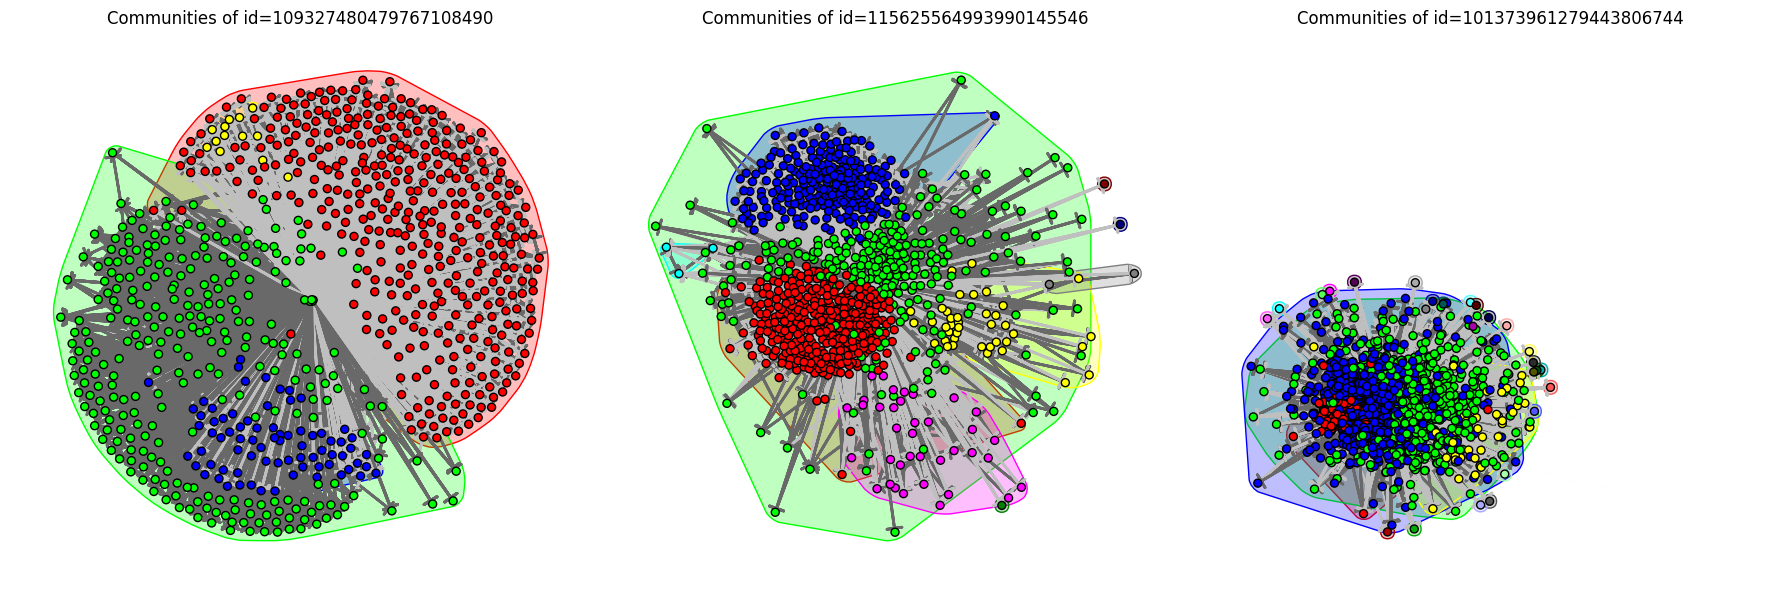

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, (node_id, graph) in enumerate(interest_graphs):
    walktrap = graph.community_walktrap()
    communities = walktrap.as_clustering()
    modularity = communities.modularity
    print(f"Node {node_id}: Modularity Score = {modularity}")

    layout = graph.layout("fr")
    
    ig.plot(
        communities,
        target=axes[idx],
        layout=layout,
        vertex_size=8,
        vertex_label=None,
        edge_arrow_size=0.3,
        #palette=ig.RainbowPalette(),
        margin=20,
        bbox=(400, 400),
        mark_groups=True
    )
    axes[idx].set_title(f"Communities of id={node_id}")

plt.tight_layout()
plt.show()

Answer:

The modularity scores are not really similar. 

The modularity scores differ notably across the three networks.
Node 115625564993990145546 has the highest modularity (≈ 0.32), indicating a clearer community structure,
while node 101373961279443806744 has the lowest score (≈ 0.19), suggesting a weaker separation between communities.

---
Now we will explore the relationship between circles and communities

#### Homogeneity and Completeness

• $C$ is the set of circles, $C = \{C_1,C_2,C_3,···\}$

• $K$ is the set of communities, $K = \{K_1,K_2,K_3,···\}$

• $a_i$ is the number of people in circle $C_i$

• $b_i$ is the number of people in community $K_i$ with circle information

• $N$ is the total number of people with circle information

• $A_{ji}$ is the number of people belonging to community $j$ and circle $i$


Then, with the above notation, we have the following expressions for the entropy

$$H(C) = -\sum_{i=1}^{|C|}\frac{a_i}{N}\log\frac{a_i}{N}\quad $$

$$ H(K) = -\sum_{i=1}^{|K|}\frac{b_i}{N}\log\frac{b_i}{N}$$

Conditional entropy
$$H(C|K) = -\sum_{j=1}^{|K|}\sum_{i=1}^{|C|}\frac{A_{ji}}{N}\log\frac{A_{ji}}{b_j}\quad $$

$$H(K|C) = -\sum_{i=1}^{|C|}\sum_{j=1}^{|K|}\frac{A_{ji}}{N}\log\frac{A_{ji}}{a_i}$$

**Homogeneity (h)**

$$h = 1 - \frac{H(C|K)}{H(C)}$$
**Completeness (c)**

$$c = 1 - \frac{H(K|C)}{H(K)}$$

#### QUESTION 21: 
Based on the expression for $h$ and $c$, explain the meaning of homogeneity and completeness in words

Answer:

Homogeneity measures how pure each community is with respect to circle membership. it measures whether each community $K$ mainly contains members from a single circle $C$.

$$
h = 1 - \frac{H(C \mid K)}{H(C)}
$$
- If each community contains nodes from only one circle: $H(C \mid K) = 0$ as $\sum_{i=1}^{|C|}\frac{A_{ji}}{N}\log\frac{A_{ji}}{b_j} = 0$, so $h = 1$ since the community information eliminate any uncertainty
- If communities mix nodes from many circles: $H(C \mid K) = H(C)$, so $h$ would close to 0, $h = 0$, since the community information cannot eliminate any uncertainty.


Completeness measures whether all nodes in a circle are assigned to the same community.

$$
c = 1 - \frac{H(K \mid C)}{H(K)}
$$

- If all members of a circle fall into one community: $H(K \mid C) = 0$, since $\sum_{j=1}^{|K|}\frac{A_{ji}}{N}\log\frac{A_{ji}}{a_i} = 0$, so $c = 1$.
- If a circle’s members are split across communities: $H(K \mid C) = H(K)$, so $c = 0$.

#### QUESTION 22: 
Compute the $h$ and $c$ values for the community structures of the 3 personal network (same nodes as Question 19). Interpret the values and provide a detailed explanation. Are there negative values? Why

In [31]:
from sklearn.metrics import homogeneity_score, completeness_score
import os

def parse_circles_file(filepath):
    node_to_circle = {}
    with open(filepath, 'r') as f:
        for idx, line in enumerate(f):
            parts = line.strip().split('\t')
            members = parts[1:]  # skip the circle name
            for uid in members:
                node_to_circle[uid] = idx  # assign circle index as label
    return node_to_circle

for node_id, graph in interest_graphs:
    circle_file = os.path.join(file_path, f"{node_id}.circles")

    if not os.path.exists(circle_file):
        continue

    gt_labels = parse_circles_file(circle_file)

    walktrap = graph.community_walktrap()
    communities = walktrap.as_clustering()

    predicted_labels = {}
    for comm_id, community in enumerate(communities):
        for vertex_id in community:
            node_name = graph.vs[vertex_id]["name"]
            predicted_labels[node_name] = comm_id

    # intersect node set (only evaluate on common nodes)
    common_nodes = list(set(gt_labels.keys()) & set(predicted_labels.keys()))
    if not common_nodes: #not found
        continue
    y_true = [gt_labels[n] for n in common_nodes]
    y_pred = [predicted_labels[n] for n in common_nodes]

    h_score = homogeneity_score(y_true, y_pred)
    c_score = completeness_score(y_true, y_pred)

    print(f"Node {node_id}:")
    print(f" - Homogeneity  = {h_score}")
    print(f" - Completeness = {c_score}\n")

Node 109327480479767108490:
 - Homogeneity  = 0.8575520347571169
 - Completeness = 0.5873219791784748

Node 115625564993990145546:
 - Homogeneity  = 0.3887094641456201
 - Completeness = 0.5525503029944587

Node 101373961279443806744:
 - Homogeneity  = 0.004926001243493634
 - Completeness = 0.005144364183812588



Result:

| Node ID               | Homogeneity | Completeness |
|------------------------|-------------|--------------|
| 109327480479767108490  | 0.8576      | 0.5873       |
| 115625564993990145546  | 0.3887      | 0.5526       |
| 101373961279443806744  | 0.0049      | 0.0051       |

These results provide the following insights:
- Node 109327480479767108490 shows very high homogeneity and moderate completeness, indicating that each community mostly contains members from a single circle (pure), but some circles are split across multiple communities.
- Node 115625564993990145546 exhibits moderate homogeneity and moderate-to-high completeness, suggesting that many circle members are grouped together, but community boundaries are not entirely clean.
- Node 101373961279443806744 shows extremely low values for both metrics, which implies that its community structure does not match the ground-truth circles at all. This could be due to the graph being too densely connected and the community detection algorithm failing to identify meaningful groupings.

And, none of the scores are negative, which is expected.
Homogeneity and completeness are mathematically bounded between 0 and 1. Therefore, it is no way to be negative for these two measures. 

- Ref: https://scikit-learn.org/stable/modules/clustering.html
- Ref: https://medium.com/data-science/7-evaluation-metrics-for-clustering-algorithms-bdc537ff54d2